Try to generate different terms with different filtering approaches
* RO
* RI
* LI
* LO was default in the previous tests

In [1]:
import random
import numpy as np
import pandas as pd
import sys
import matplotlib.pyplot as plt
from fitter import Fitter, get_common_distributions
from deap import tools, base, creator
import seaborn as sns

sys.path.append("../")
from calculus.term import *
from calculus.strategy import *
from calculus.generation import *
from calculus.generation_threading import *

from calculus_utils.drawing import *
from calculus_utils.algorithms import *
from calculus_utils.outliers_cleaning import clear_arr

from vd_env.lambda_env import LambdaEnv
from vd_env.run_greedy_policy import run_greedy_policy
from vd_env.run_e_greedy_policy import run_e_greedy_policy

## Generating with RO-filtering

In [2]:
RANDOM_AVERAGE_COUNT = 20

terms_RO, stepsRO_RO = gen_filtered_lambda_terms_v2(count_terms=100, filtering_strategy=RightmostOutermostStrategy())
stepsLO_RO = [term.normalize(LeftmostOutermostStrategy())[1] for term in tqdm(terms_RO)]
stepsRI_RO = [term.normalize(RightmostInnermostStrategy())[1] for term in tqdm(terms_RO)]
stepsRand_RO = [sum(term.normalize(RandomStrategy())[1] for i in range(RANDOM_AVERAGE_COUNT)) / RANDOM_AVERAGE_COUNT
                for term in tqdm(terms_RO)]

100%|██████████| 102/102 [00:15<00:00,  6.43it/s]


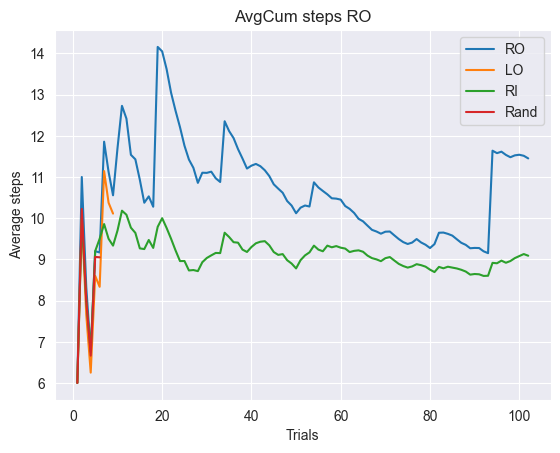

In [4]:
comp_data = {
    "RO": (stepsRO_RO, "-"),
    "LO": (stepsLO_RO, "-"),
    "RI": (stepsRI_RO, "-"),
    "Rand": (stepsRand_RO, "-"),
}
draw_cumulative_avg_comparison(comp_data, title="AvgCum steps RO")

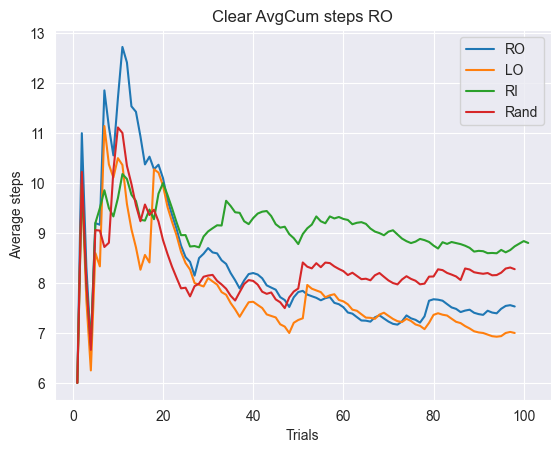

In [9]:
comp_data = {
    "RO": (clear_arr(stepsRO_RO), "-"),
    "LO": (clear_arr(stepsLO_RO), "-"),
    "RI": (clear_arr(stepsRI_RO), "-"),
    "Rand": (clear_arr(stepsRand_RO), "-"),
}
draw_cumulative_avg_comparison(comp_data, title="Clear AvgCum steps RO")

In [6]:
steps_mixed_all = []
expected_values = []
values = list(range(0, 101, 5))
iters = len(values) - 1

for inx, p_lo in enumerate(values):
    p = (p_lo / 100, 1 - p_lo / 100)
    steps = [sum([term.normalize(MixedStrategy([LeftmostOutermostStrategy(), RightmostInnermostStrategy()], p))[1]
                  for i in range(RANDOM_AVERAGE_COUNT)]) / RANDOM_AVERAGE_COUNT
             for term in tqdm(terms_RO, desc=f"it {inx} / {iters}")]
    steps_mixed_all.append(steps)

it 20 / 20: 100%|██████████| 102/102 [00:10<00:00,  9.30it/s]


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 31.67it/s]


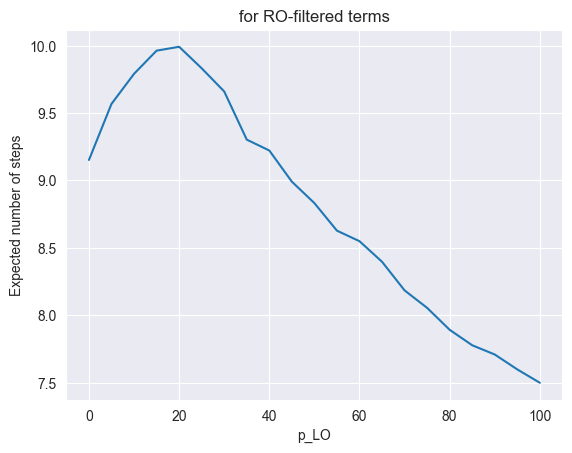

In [7]:
for steps in steps_mixed_all:
    steps = list(filter(lambda x: x != float("inf"), steps))
    steps = list(filter(lambda x: x != 0, steps))

    distributions = get_common_distributions()
    distributions.remove("expon")
    f_ln = Fitter([np.log(step) for step in steps], distributions=distributions)
    f_ln.fit()

    mu, sigma = f_ln.fitted_param["norm"]
    result = np.e ** (mu + (sigma ** 2) / 2)
    expected_values.append(result)

plt.plot(values, expected_values)
plt.xlabel("p_LO")
plt.ylabel("Expected number of steps")
plt.title("for RO-filtered terms")
plt.show()

In [8]:
inx_best = expected_values.index(min(expected_values))
inx_best

20

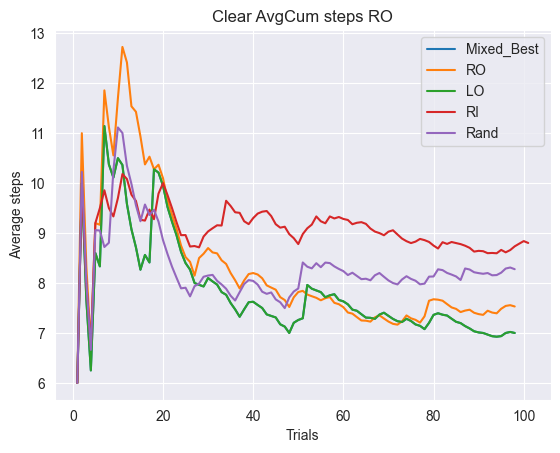

In [12]:
comp_data = {
    "Mixed_Best": (clear_arr(steps_mixed_all[inx_best]), "-"),
    "RO": (clear_arr(stepsRO_RO), "-"),
    "LO": (clear_arr(stepsLO_RO), "-"),
    "RI": (clear_arr(stepsRI_RO), "-"),
    "Rand": (clear_arr(stepsRand_RO), "-"),
}
draw_cumulative_avg_comparison(comp_data, title="Clear AvgCum steps RO")

## Generating with RI-filtering

In [2]:
terms_RI, stepsRI_RI = gen_filtered_lambda_terms_v2(count_terms=100, filtering_strategy=RightmostInnermostStrategy())
stepsLO_RI = [term.normalize(LeftmostOutermostStrategy())[1] for term in tqdm(terms_RI)]
stepsRO_RI = [term.normalize(RightmostOutermostStrategy())[1] for term in tqdm(terms_RI)]
stepsRand_RI = [sum(term.normalize(RandomStrategy())[1] for i in range(RANDOM_AVERAGE_COUNT)) / RANDOM_AVERAGE_COUNT
                for term in tqdm(terms_RI)]

  0%|          | 0/102 [00:00<?, ?it/s]

NameError: name 'RANDOM_AVERAGE_COUNT' is not defined

In [4]:
RANDOM_AVERAGE_COUNT = 20
stepsRand_RI = [sum(term.normalize(RandomStrategy())[1] for i in range(RANDOM_AVERAGE_COUNT)) / RANDOM_AVERAGE_COUNT
                for term in tqdm(terms_RI)]


100%|██████████| 102/102 [00:10<00:00,  9.68it/s][A


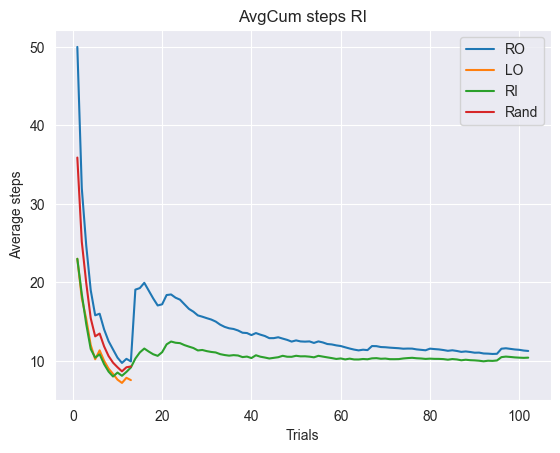

In [5]:
comp_data = {
    "RO": (stepsRO_RI, "-"),
    "LO": (stepsLO_RI, "-"),
    "RI": (stepsRI_RI, "-"),
    "Rand": (stepsRand_RI, "-"),
}
draw_cumulative_avg_comparison(comp_data, title="AvgCum steps RI")

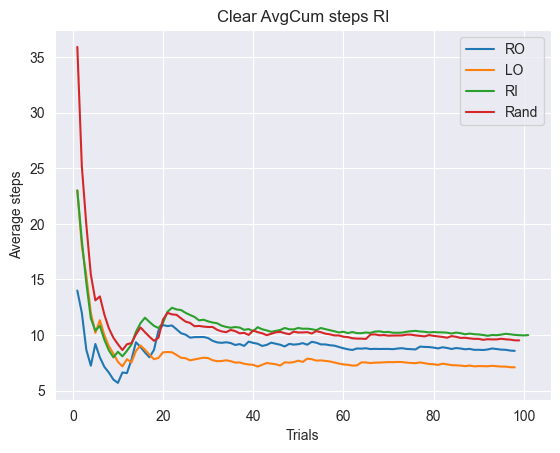

In [6]:
comp_data = {
    "RO": (clear_arr(stepsRO_RI), "-"),
    "LO": (clear_arr(stepsLO_RI), "-"),
    "RI": (clear_arr(stepsRI_RI), "-"),
    "Rand": (clear_arr(stepsRand_RI), "-"),
}
draw_cumulative_avg_comparison(comp_data, title="Clear AvgCum steps RI")

In [8]:
steps_mixed_all = []
expected_values = []
values = list(range(0, 101, 5))
iters = len(values) - 1

for inx, p_lo in enumerate(values):
    p = (p_lo / 100, 1 - p_lo / 100)
    steps = [sum([term.normalize(MixedStrategy([LeftmostOutermostStrategy(), RightmostInnermostStrategy()], p))[1]
                  for i in range(RANDOM_AVERAGE_COUNT)]) / RANDOM_AVERAGE_COUNT
             for term in tqdm(terms_RI, desc=f"it {inx} / {iters}")]
    steps_mixed_all.append(steps)

it 20 / 20: 100%|██████████| 102/102 [00:03<00:00, 32.88it/s]


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 29.95it/s]


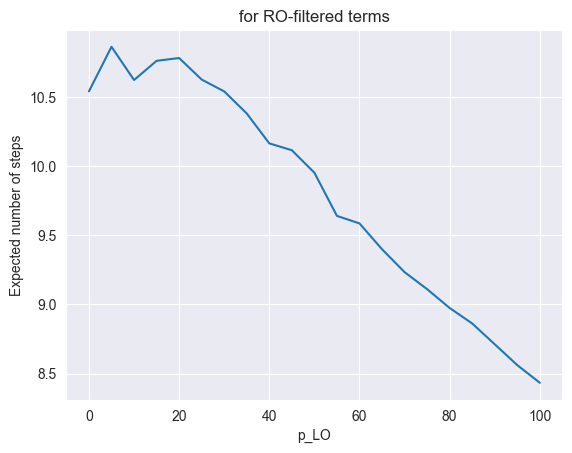

In [9]:
for steps in steps_mixed_all:
    steps = list(filter(lambda x: x != float("inf"), steps))
    steps = list(filter(lambda x: x != 0, steps))

    distributions = get_common_distributions()
    distributions.remove("expon")
    f_ln = Fitter([np.log(step) for step in steps], distributions=distributions)
    f_ln.fit()

    mu, sigma = f_ln.fitted_param["norm"]
    result = np.e ** (mu + (sigma ** 2) / 2)
    expected_values.append(result)

plt.plot(values, expected_values)
plt.xlabel("p_LO")
plt.ylabel("Expected number of steps")
plt.title("for RO-filtered terms")
plt.show()

In [10]:
inx_best = expected_values.index(min(expected_values))
inx_best

20

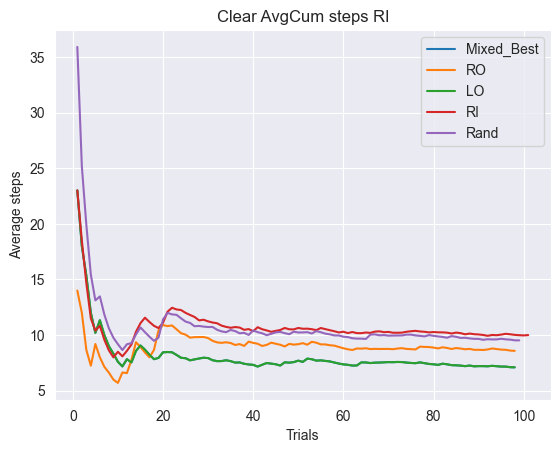

In [12]:
comp_data = {
    "Mixed_Best": (clear_arr(steps_mixed_all[inx_best]), "-"),
    "RO": (clear_arr(stepsRO_RI), "-"),
    "LO": (clear_arr(stepsLO_RI), "-"),
    "RI": (clear_arr(stepsRI_RI), "-"),
    "Rand": (clear_arr(stepsRand_RI), "-"),
}
draw_cumulative_avg_comparison(comp_data, title="Clear AvgCum steps RI")

## Generating with LI-filtering

In [13]:
RANDOM_AVERAGE_COUNT = 20

terms_LI, stepsLI_LI = gen_filtered_lambda_terms_v2(count_terms=100, filtering_strategy=LeftmostInnermostStrategy())
stepsLO_LI = [term.normalize(LeftmostOutermostStrategy())[1] for term in tqdm(terms_LI)]
stepsRO_LI = [term.normalize(RightmostOutermostStrategy())[1] for term in tqdm(terms_LI)]
stepsRI_LI = [term.normalize(RightmostInnermostStrategy())[1] for term in tqdm(terms_LI)]
stepsRand_LI = [sum(term.normalize(RandomStrategy())[1] for i in range(RANDOM_AVERAGE_COUNT)) / RANDOM_AVERAGE_COUNT
                for term in tqdm(terms_LI)]

100%|██████████| 100/100 [00:05<00:00, 17.05it/s]


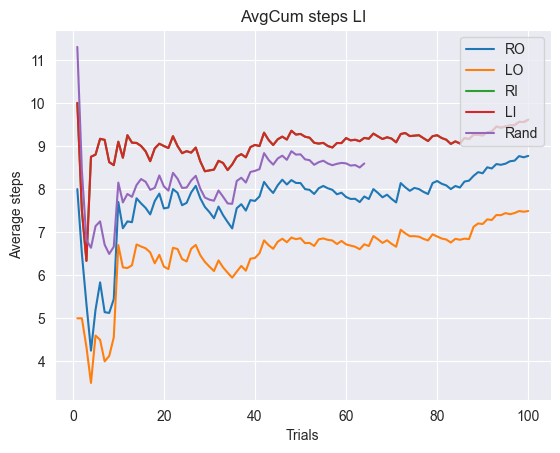

In [14]:
comp_data = {
    "RO": (stepsRO_LI, "-"),
    "LO": (stepsLO_LI, "-"),
    "RI": (stepsRI_LI, "-"),
    "LI": (stepsLI_LI, "-"),
    "Rand": (stepsRand_LI, "-"),
}
draw_cumulative_avg_comparison(comp_data, title="AvgCum steps LI")

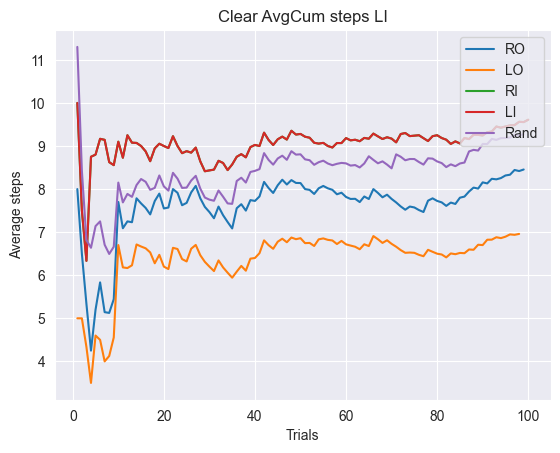

In [15]:
comp_data = {
    "RO": (clear_arr(stepsRO_LI), "-"),
    "LO": (clear_arr(stepsLO_LI), "-"),
    "RI": (clear_arr(stepsRI_LI), "-"),
    "LI": (clear_arr(stepsLI_LI), "-"),
    "Rand": (clear_arr(stepsRand_LI), "-"),
}
draw_cumulative_avg_comparison(comp_data, title="Clear AvgCum steps LI")

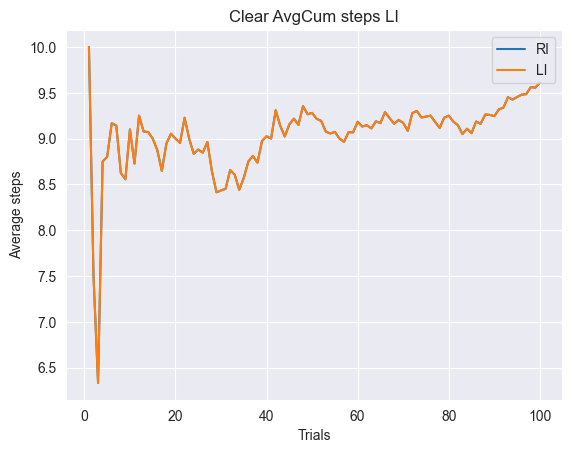

In [23]:
comp_data = {
    "RI": (clear_arr(stepsRI_LI), "-"),
     "LI": (clear_arr(stepsLI_LI), "-"),
}
draw_cumulative_avg_comparison(comp_data, title="Clear AvgCum steps LI")

In [17]:
steps_mixed_all = []
expected_values = []
values = list(range(0, 101, 5))
iters = len(values) - 1

for inx, p_lo in enumerate(values):
    p = (p_lo / 100, 1 - p_lo / 100)
    steps = [sum([term.normalize(MixedStrategy([LeftmostOutermostStrategy(), RightmostInnermostStrategy()], p))[1]
                  for i in range(RANDOM_AVERAGE_COUNT)]) / RANDOM_AVERAGE_COUNT
             for term in tqdm(terms_RI, desc=f"it {inx} / {iters}")]
    steps_mixed_all.append(steps)

it 20 / 20: 100%|██████████| 102/102 [00:03<00:00, 32.87it/s]


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 28.38it/s]


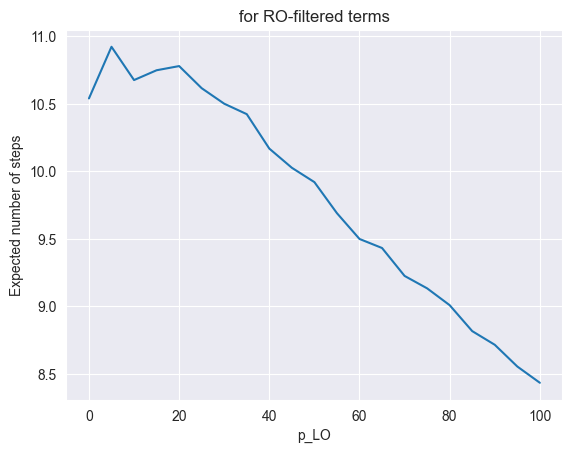

In [18]:
for steps in steps_mixed_all:
    steps = list(filter(lambda x: x != float("inf"), steps))
    steps = list(filter(lambda x: x != 0, steps))

    distributions = get_common_distributions()
    distributions.remove("expon")
    f_ln = Fitter([np.log(step) for step in steps], distributions=distributions)
    f_ln.fit()

    mu, sigma = f_ln.fitted_param["norm"]
    result = np.e ** (mu + (sigma ** 2) / 2)
    expected_values.append(result)

plt.plot(values, expected_values)
plt.xlabel("p_LO")
plt.ylabel("Expected number of steps")
plt.title("for RO-filtered terms")
plt.show()

In [19]:
inx_best = expected_values.index(min(expected_values))
inx_best

20

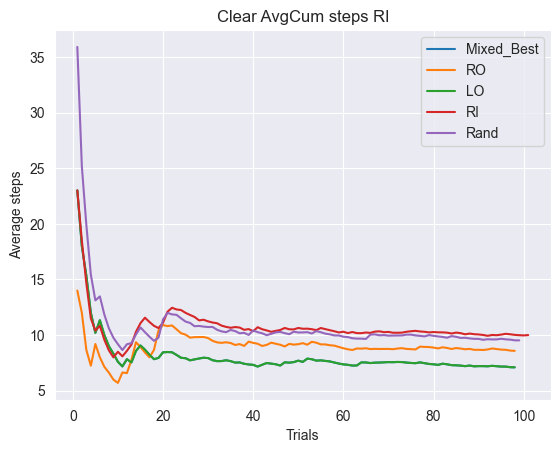

In [20]:
comp_data = {
    "Mixed_Best": (clear_arr(steps_mixed_all[inx_best]), "-"),
    "RO": (clear_arr(stepsRO_RI), "-"),
    "LO": (clear_arr(stepsLO_RI), "-"),
    "RI": (clear_arr(stepsRI_RI), "-"),
    "Rand": (clear_arr(stepsRand_RI), "-"),
}
draw_cumulative_avg_comparison(comp_data, title="Clear AvgCum steps RI")